In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import copy
import numpy as np
from keras.models import Sequential, Model
#from keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.python.framework import ops
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import pandas as pd
import cv2
import scipy.misc
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.layers.merge import concatenate
from sklearn import metrics
import os
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_generator = ImageDataGenerator(rescale=1./255.,
                               shear_range=0.15,
                               zoom_range=0.15,
                               featurewise_center=False,
                               samplewise_center=False,
                               featurewise_std_normalization=False,
                               samplewise_std_normalization=False,
                               zca_whitening=False,
                               zca_epsilon=1e-06,
                               rotation_range=0,
                               width_shift_range=0.0,
                               height_shift_range=0.0,
                               brightness_range=None,
                               channel_shift_range=0.0,                             
                               cval=0.0,
                               horizontal_flip=False,
                               preprocessing_function=None,
                               data_format=None,
                               validation_split=0.0)
batch_size = 32

Training_datas= data_generator.flow_from_directory(
    '/content/gdrive/My Drive/large_dataset(160)/Training',
    target_size = (160, 160),
    batch_size = batch_size,
    shuffle = True,
    class_mode ='binary'
)

#image_gen1 = ImageDataGenerator(rescale=1./255.)

Validation_datas = data_generator.flow_from_directory(
    '/content/gdrive/My Drive/large_dataset(160)/Val',
    target_size = (160, 160),
    batch_size = batch_size,
    shuffle = True,
    class_mode = 'binary'
)
Test_Datas = data_generator.flow_from_directory(
    '/content/gdrive/My Drive/large_dataset(160)/Testing',
    target_size = (160, 160),
    batch_size = 1,
    shuffle = False,
    class_mode ='binary'
)

Found 5025 images belonging to 2 classes.
Found 640 images belonging to 2 classes.
Found 1304 images belonging to 2 classes.


In [ ]:
act_sig='sigmoid'
act_relu = 'relu'
x = 0.001
Input = (160,160,3)
init='he_normal'
Dropoutt = 0.15
padding = 'same'

CLASSIFIER = Sequential()
CLASSIFIER.add(BatchNormalization(input_shape = Input))
CLASSIFIER.add(Conv2D(filters=16, kernel_size=3, activation=act_relu, padding="same"))
CLASSIFIER.add(MaxPooling2D(pool_size=2))
CLASSIFIER.add(BatchNormalization(epsilon=x))

CLASSIFIER.add(Conv2D(filters=32, kernel_size=3, activation=act_relu, padding="same"))
CLASSIFIER.add(MaxPooling2D(pool_size=2))
CLASSIFIER.add(BatchNormalization(epsilon=x))
CLASSIFIER.add(Dropout(Dropoutt))

CLASSIFIER.add(Conv2D(filters=64, kernel_size=3, activation=act_relu, padding="same"))
CLASSIFIER.add(MaxPooling2D(pool_size=2))
CLASSIFIER.add(BatchNormalization(epsilon=x))
CLASSIFIER.add(Dropout(Dropoutt))

CLASSIFIER.add(Conv2D(filters =128, kernel_size=3, activation=act_relu, padding="same"))
CLASSIFIER.add(MaxPooling2D(pool_size=2))
CLASSIFIER.add(BatchNormalization(epsilon=x))
CLASSIFIER.add(Dropout(Dropoutt))

CLASSIFIER.add(Conv2D(filters=256, kernel_size=3, activation=act_relu, padding="same"))
CLASSIFIER.add(MaxPooling2D(pool_size=2))
CLASSIFIER.add(BatchNormalization(epsilon=x))
CLASSIFIER.add(Dropout(Dropoutt))

CLASSIFIER.add(Conv2D(filters=512, kernel_size=3, activation=act_relu, padding="same"))
CLASSIFIER.add(MaxPooling2D(pool_size=2))
CLASSIFIER.add(BatchNormalization(epsilon=x))
CLASSIFIER.add(Dropout(Dropoutt))
"""
model.add(Conv2D(filters=1024, kernel_size=3, activation=act_relu, padding="same"))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=x))
model.add(Dropout(0.3))
"""
#model.add(GlobalAveragePooling2D())
CLASSIFIER.add(Flatten())

CLASSIFIER.add(Dense(512, kernel_initializer=init, activation=act_relu))
CLASSIFIER.add(Dropout(Dropoutt))


CLASSIFIER.add(Dense(256, kernel_initializer=init, activation=act_relu))
CLASSIFIER.add(Dropout(Dropoutt))


CLASSIFIER.add(Dense(128, kernel_initializer=init, activation=act_relu))
CLASSIFIER.add(Dropout(Dropoutt))


CLASSIFIER.add(Dense(64, kernel_initializer=init, activation=act_relu))
CLASSIFIER.add(Dropout(Dropoutt))


CLASSIFIER.add(Dense(32, kernel_initializer=init, activation=act_relu))
CLASSIFIER.add(Dropout(Dropoutt))

CLASSIFIER.add(Dense(1, activation=act_sig))

CLASSIFIER.summary() 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_28 (Bat  (None, 160, 160, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_24 (Conv2D)          (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 80, 80, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_29 (Bat  (None, 80, 80, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 80, 80, 32)        4640      
                                                      

In [ ]:
# Parameters Initialization
from tensorflow.keras.optimizers import Adam, RMSprop

CLASSIFIER.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

Training_Steps = 5025//batch_size
Validation_Steps = 1304//batch_size
history = CLASSIFIER.fit(
    Training_datas,
    epochs=25,
    steps_per_epoch=Training_Steps,
    validation_data=Validation_datas,
    validation_steps=Validation_Steps
)

#odel.save("custom_augmented_model.h5")

Epoch 1/25
157/157 [==============================] - 271s 2s/step - loss: 0.1817 - accuracy: 0.9323 - val_loss: 0.6221 - val_accuracy: 0.7344
Epoch 2/25
157/157 [==============================] - 271s 2s/step - loss: 0.1500 - accuracy: 0.9493 - val_loss: 1.1940 - val_accuracy: 0.7344
Epoch 3/25
157/157 [==============================] - 271s 2s/step - loss: 0.1206 - accuracy: 0.9615 - val_loss: 2.0493 - val_accuracy: 0.7344
Epoch 4/25
157/157 [==============================] - 275s 2s/step - loss: 0.1222 - accuracy: 0.9597 - val_loss: 0.4033 - val_accuracy: 0.8047
Epoch 5/25
157/157 [==============================] - 271s 2s/step - loss: 0.1063 - accuracy: 0.9639 - val_loss: 0.4963 - val_accuracy: 0.8141
Epoch 6/25
157/157 [==============================] - 269s 2s/step - loss: 0.1033 - accuracy: 0.9654 - val_loss: 0.1974 - val_accuracy: 0.9406
Epoch 7/25
157/157 [==============================] - 274s 2s/step - loss: 0.0903 - accuracy: 0.9700 - val_loss: 0.1604 - val_accuracy: 0.9359

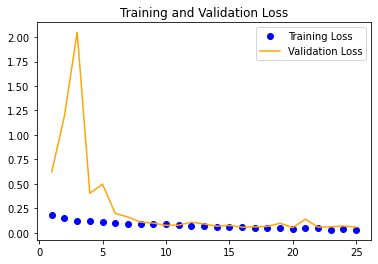

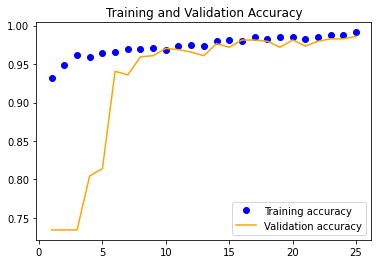

In [ ]:
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [ ]:
def create_test_data(dir,n):
    test_datas = []
    for img in tqdm(os.listdir(dir)):
        label = n
        path = os.path.join(dir,img)
        img = cv2.imread(path)
        #test_datas.append([np.array(img),np.array(label)])
        test_datas.append(np.asarray(img).astype('float32'))
        
    np.save('test_datas.npy', test_datas)
    return test_datas

test_data_n = create_test_data('/content/gdrive/My Drive/large_dataset(160)/Testing/no',0.0)
test_data_y = create_test_data('/content/gdrive/My Drive/large_dataset(160)/Testing/yes',1.0)

#x = np.hsplit(test_data_y)
#y = np.hsplit(test_data_n)
new_test_datas = np.concatenate((test_data_n, test_data_y), axis=0)
new_test_datas = tf.convert_to_tensor(new_test_datas)
#new_test_datas_l=concatenate(x[1],y[1])
# If you have already created the dataset:
#train_data = np.load('train_data.npy')

y_pred = model.predict(Test_Datas)
#print(y_pred)
y_test = Test_Datas.classes
y_pred=np.round_(y_pred)

accuracy1=sum(y_pred.flatten()==Test_Datas.classes)/len(Test_Datas.classes)
print("accuracy without MC droupout " + str(accuracy1))
#print(y_pred.flatten())
#print(Test_Datas.classes)

y_samples = np.stack([CLASSIFIER(new_test_datas,training=True) for sample in range(10)])
y_samples_mean = y_samples.mean(axis=0)
y_samples_std = y_samples.std(axis=0)

#print(f'Mean = {np.round(y_samples_mean[:1],2)}')
#print(f'Std  = {np.round(y_samples_std[:1],2)}')

y_pred=np.round_(y_samples_mean)
#print(y_pred.flatten())
accuracy=sum(y_pred.flatten()==Test_Datas.classes)/len(Test_Datas.classes)
print("accuray with  MC droupout is " + str(accuracy))

"""
"""

print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred > 0.5))




100%|██████████| 899/899 [00:03<00:00, 266.69it/s]


accuracy without MC droupout 0.977760736196319
accuray with  MC droupout is 0.9892638036809815
ROC AUC Score: 0.9915351762589434
AP Score: 0.9943977204767512

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       405
           1       1.00      0.99      0.99       899

    accuracy                           0.99      1304
   macro avg       0.98      0.99      0.99      1304
weighted avg       0.99      0.99      0.99      1304

